**QAT ASSIGNMENT-1**

Submission By : Abhinav Sapra
                MCS202301

In [56]:
pip install qiskit

In [57]:
pip install qiskit_aer

In [58]:
pip install pylatexenc

In [90]:
from qiskit import QuantumCircuit, transpile, assemble, execute
from qiskit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector
import matplotlib, pylatexenc, numpy
from math import pi
from qiskit.circuit.library import QFT
from numpy import sqrt

**Problem 1**

In [60]:
# Here we will use Aer's AerSimulator
simulator = AerSimulator()

#Part (a)
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)
circuit.cx(0, 1)

densitymat=qi.DensityMatrix.from_instruction(circuit) # Constructing density matrix
densitymat.draw('latex')

<IPython.core.display.Latex object>

In [61]:
statevec=qi.Statevector.from_instruction(circuit) # generate statevector
statevec.draw('latex')

<IPython.core.display.Latex object>

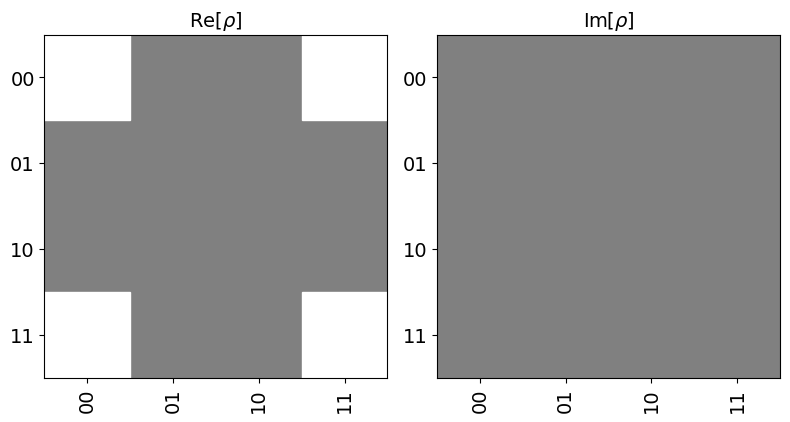

In [62]:
statevec.draw('hinton')

{'00': 503, '11': 497}


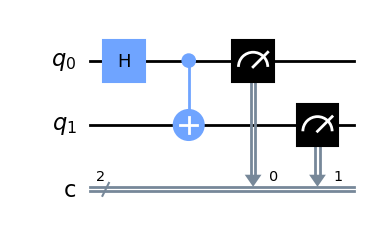

In [63]:
# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])


# Compile the circuit
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print(counts)

# draw the circuit
circuit.draw("mpl")

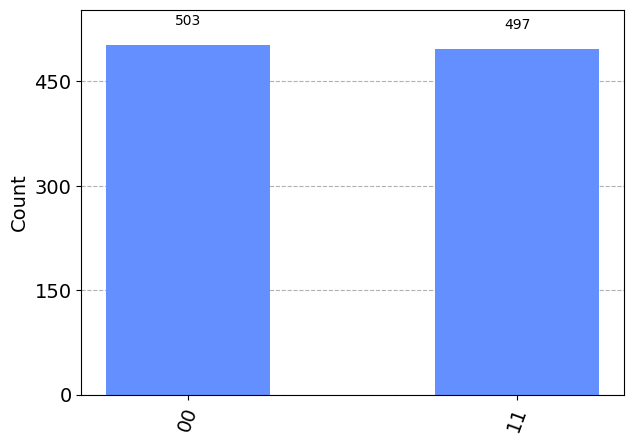

In [64]:
# Plot a histogram
plot_histogram(counts)

In [65]:
#Part (b)
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.x(0)
circuit.h(0)
circuit.cx(0, 1)

densitymat=qi.DensityMatrix.from_instruction(circuit) # Constructing density matrix
densitymat.draw('latex')


<IPython.core.display.Latex object>

In [66]:
statevec=qi.Statevector.from_instruction(circuit) # generate statevector
statevec.draw('latex')

<IPython.core.display.Latex object>

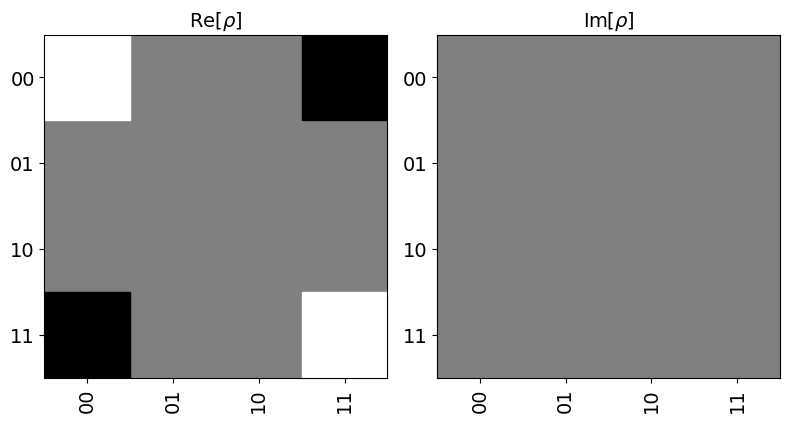

In [67]:
statevec.draw('hinton')

{'00': 517, '11': 483}


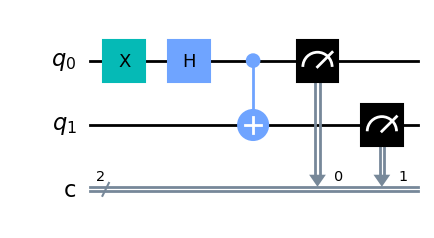

In [68]:
# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Draw the circuit
circuit.draw("mpl")

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print(counts)

circuit.draw("mpl")

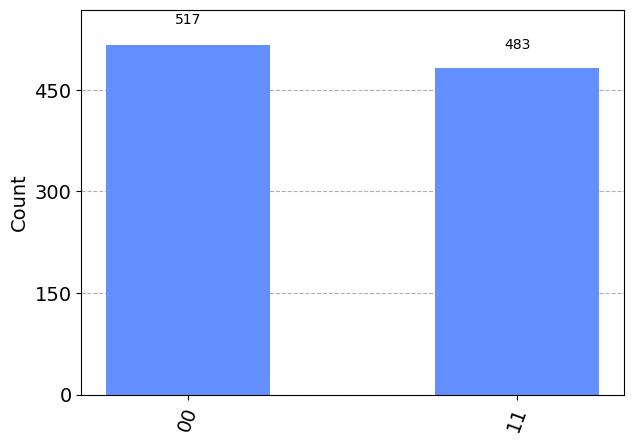

In [69]:
# Plot a histogram
plot_histogram(counts)

In [70]:
#Part (c)
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.x(1)
circuit.h(0)
circuit.cx(0, 1)



densitymat=qi.DensityMatrix.from_instruction(circuit) # Constructing density matrix
densitymat.draw('latex')


<IPython.core.display.Latex object>

In [71]:
statevec=qi.Statevector.from_instruction(circuit) # generate statevector
statevec.draw('latex')

<IPython.core.display.Latex object>

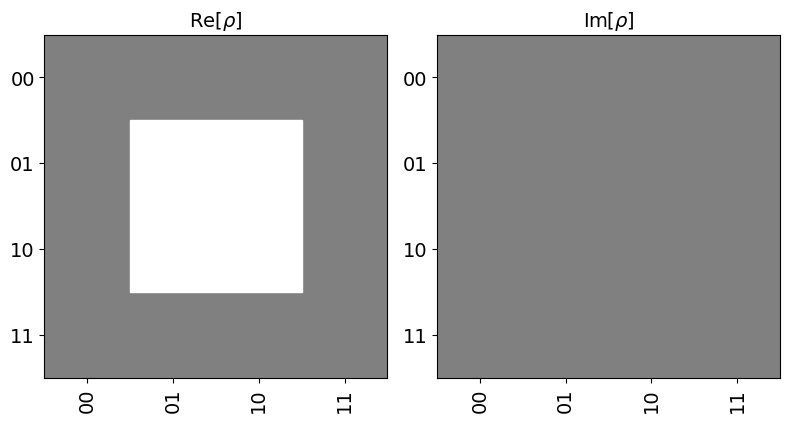

In [72]:
statevec.draw('hinton')

{'10': 498, '01': 502}


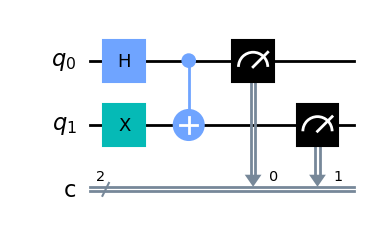

In [73]:
# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Draw the circuit
circuit.draw("mpl")

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
sim = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = sim.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print(counts)

circuit.draw("mpl")

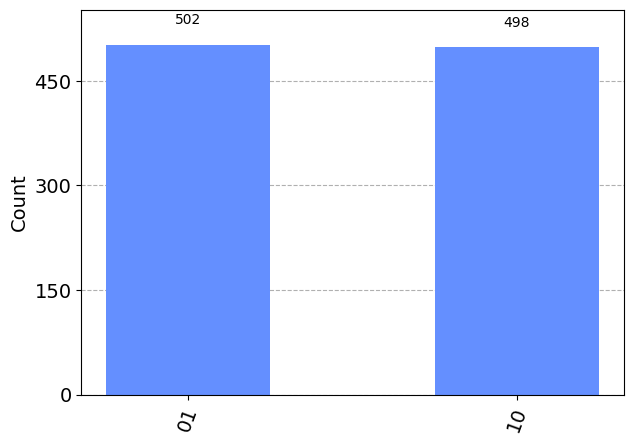

In [74]:
# Plot a histogram
plot_histogram(counts)

In [75]:
#Part (d)
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.x(0)
circuit.x(1)
circuit.h(0)
circuit.cx(0, 1)

densitymat=qi.DensityMatrix.from_instruction(circuit) # Constructing density matrix
densitymat.draw('latex')

<IPython.core.display.Latex object>

In [76]:
statevec=qi.Statevector.from_instruction(circuit) # generate statevector
statevec.draw('latex')

<IPython.core.display.Latex object>

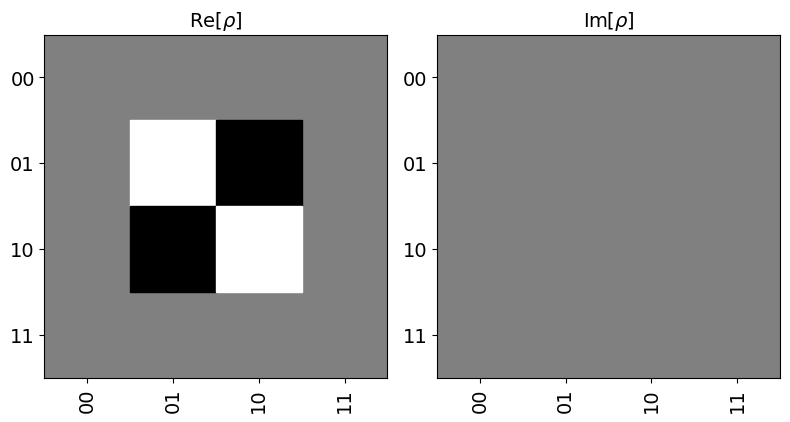

In [77]:
statevec.draw('hinton')

{'10': 495, '01': 505}


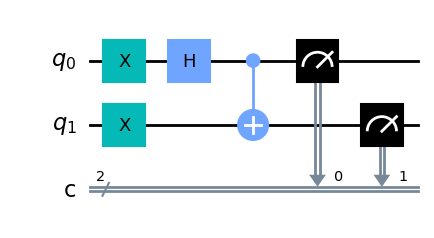

In [78]:
# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Draw the circuit
circuit.draw("mpl")

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
sim = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = sim.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print(counts)

circuit.draw("mpl")

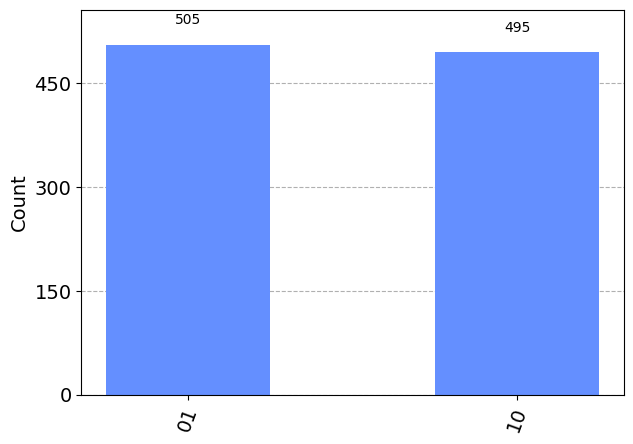

In [79]:
# Plot a histogram
plot_histogram(counts)

In [80]:
#Part (e)
circuit = QuantumCircuit(4, 4)

# Add a H gate on qubit 0
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.cx(0,3)



In [81]:
densitymat=qi.DensityMatrix.from_instruction(circuit) # Constructing density matrix
densitymat.draw('latex')

<IPython.core.display.Latex object>

In [82]:
statevec=qi.Statevector.from_instruction(circuit) # generate statevector
statevec.draw('latex')

<IPython.core.display.Latex object>

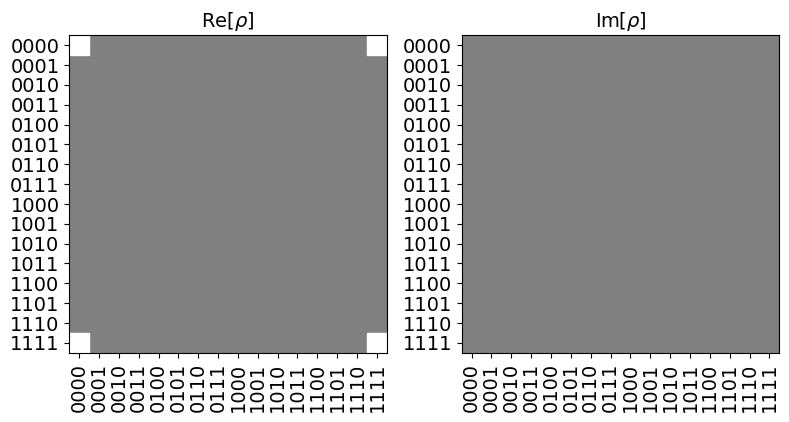

In [83]:
statevec.draw('hinton')

{'1111': 503, '0000': 497}


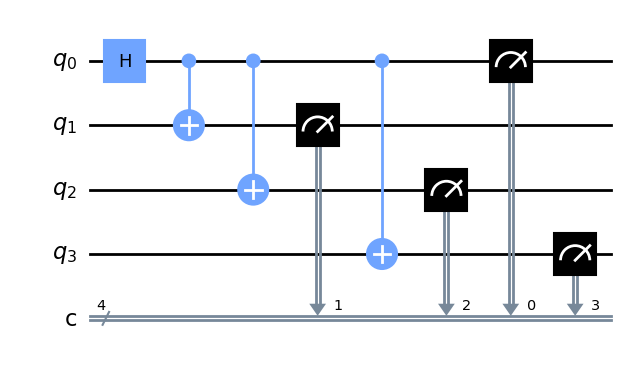

In [84]:
# Map the quantum measurement to the classical bits
circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Draw the circuit
circuit.draw("mpl")

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
sim = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = sim.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print(counts)

circuit.draw("mpl")

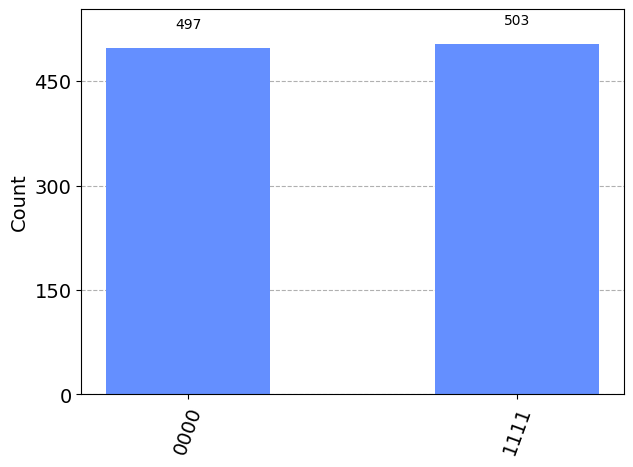

In [85]:
# Plot a histogram
plot_histogram(counts)

**Problem 2**

In [94]:
def reduce_swap(qc):
    # Create a new Quantum Circuit with the same number of qubits
    reduced_qc = QuantumCircuit(qc.num_qubits, qc.num_clbits)

    for instr, qargs, cargs in qc.data:
        if instr.name == 'swap':
            q1, q2 = qargs
            reduced_qc.cx(q1, q2)  # CNOT(a, b)
            reduced_qc.cx(q2, q1)  # CNOT(b, a)
            reduced_qc.cx(q1, q2)  # CNOT(a, b)
        else:
            reduced_qc.append(instr, qargs, cargs)

    return reduced_qc

Example:

In [98]:

# Create a quantum circuit with three qubits
qc = QuantumCircuit(3)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Apply CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)

# Apply SWAP gate to swap qubit 1 and qubit 2
qc.swap(1, 2)

# Apply X gate on qubit 0
qc.x(0)

# Draw the circuit
print(qc)


     ┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├──X──
          └───┘  │  
q_2: ────────────X──
                    


In [100]:
new_qc = reduce_swap(qc)
print(new_qc)


     ┌───┐     ┌───┐          
q_0: ┤ H ├──■──┤ X ├──────────
     └───┘┌─┴─┐└───┘┌───┐     
q_1: ─────┤ X ├──■──┤ X ├──■──
          └───┘┌─┴─┐└─┬─┘┌─┴─┐
q_2: ──────────┤ X ├──■──┤ X ├
               └───┘     └───┘


**Problem 3**

{'001': 5000}


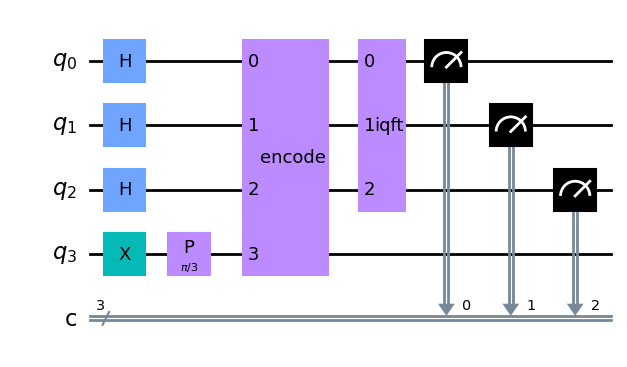

In [87]:
qpe = QuantumCircuit(4, 3)
qpe.h(0)
qpe.h(1)
qpe.h(2)
qpe.x(3)
qpe.p(pi/3, 3)

encode = QuantumCircuit(4, name = "encode")
encode.cp(pi/4, 0, 3)
encode.cp(pi/2, 1, 3)
encode.cp(pi, 2, 3)
iqft = QFT(num_qubits=3, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='iqft')

qpe.append(encode, qargs=[0,1,2,3])
qpe.append(iqft, qargs=[0,1,2])
qpe.measure([0,1,2], [0,1,2])

compiled_qpe = transpile(qpe, simulator)

# Execute the circuit on the aer simulator
sim_qpe = simulator.run(compiled_qpe, shots=5000)

# Grab results from the job
result_qpe = sim_qpe.result()

# Returns counts
counts_qpe = result_qpe.get_counts(compiled_qpe)
print(counts_qpe)

qpe.draw("mpl")

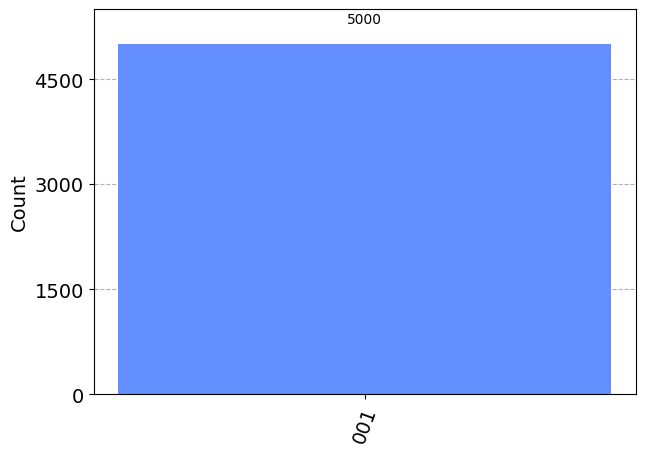

In [88]:
# Plot a histogram
plot_histogram(counts_qpe)